# Assignment 2 / Author Profiling -- Gender and Age

In [2]:
import nltk
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import itertools
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import sys
from sklearn.metrics import classification_report

In [3]:
def plot_confusion_matrix(cm, classes, title = 'Confusion matrix', cmap = plt.cm.Greens):
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm_norm[np.isnan(cm_norm)] = 0
    cm_norm = np.around(cm_norm, decimals = 3)
        
    plt.imshow(cm_norm, interpolation='nearest', cmap = cmap)
    
    thresh = cm_norm.max() / 2.
    for i, j in itertools.product(range(cm_norm.shape[0]), range(cm_norm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm_norm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [4]:
def matrixmerge(text1, text2):
    col = []
    for i in range(len(text1)):
        if text1[i] == 'male' and text2[i] == '10s':
            col.append('male 10s')
        elif text1[i] == 'male' and text2[i] == '20s':
            col.append('male 20s')
        elif text1[i] == 'male' and text2[i] == '30s':
            col.append('male 30s')
        elif text1[i] == 'female' and text2[i] == '10s':
            col.append('female 10s')
        elif text1[i] == 'female' and text2[i] == '20s':
            col.append('female 20s')
        elif text1[i] == 'female' and text2[i] == '30s':
            col.append('female 30s')
    return col

## Daten einlesen

In [5]:
messages = pd.read_csv('Messages_train.csv', sep=',')

In [6]:
messages.head()

,id,text,person_gender,person_age
0,117808,The particular DKNY bags are among the leading...,male,20s
1,5634,Dental implants are posts made of titanium tha...,female,30s
2,94820,"<p style=""text-align:center;]<a href=""http://e...",female,20s
3,64510,The primary business I joined was the Gospel N...,male,20s
4,89288,Taking QR Codes to Another Level<br />QR Codes...,female,30s


In [7]:
#prepare data
N = len(messages)
texts = []
genders = []
age = []

for i in range(N):
    texts.append(messages['text'][i])
    genders.append(messages['person_gender'][i])
    age.append(messages['person_age'][i])
    
train_text = texts[:int(N*0.8)]
train_gender = genders[:int(N*0.8)]
train_age = age[:int(N*0.8)]

validation_text = texts[int(N*0.8):]
validation_gender = genders[int(N*0.8):]
validation_age = age[int(N*0.8):]

# Classifier trainieren

In [8]:

# Wurde zuerst mit SVM probiert, jedoch war NB genauer
'''gender_clf_svm = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',
                       alpha=1e-3, n_iter=5, random_state=42)),
 ])

age_clf_svm = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',
                       alpha=1e-3, n_iter=5, random_state=42)),
 ])
_ = gender_clf_svm.fit(train_text, train_gender)
predicted_svm_gender = gender_clf_svm.predict(validation_text)
    
_ = age_clf_svm.fit(train_text, train_age)
predicted_svm_age = age_clf_svm.predict(validation_text)\
'''
text_clf_age = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf', MultinomialNB()),
 ])

text_clf_gender = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf', MultinomialNB()),
 ])

text_clf_age = text_clf_age.fit(train_text, train_age)
predicted_age = text_clf_age.predict(train_text)
text_clf_gender = text_clf_gender.fit(train_text, train_gender)
predicted_gender = text_clf_gender.predict(train_text)


# Genauigkeiten 

In [9]:
print('Gender: ', np.mean(predicted_gender == train_gender))
print('Age: ', np.mean(predicted_age == train_age))

Gender:  0.7204375
Age:  0.5736875


## Classifiers

In [10]:
def classify_gender(text):
    text = [text]
    predict = text_clf_gender.predict(text)
    return predict[0]
    

def classify_age(text):
    text = [text]
    predict = text_clf_age.predict(text)
    return predict[0]

In [16]:
# Clasisfiers testen
test_ages = []
test_genders = []
test_both = []
for text in validation_text:
    test_ages.append(classify_age(text))
    test_genders.append(classify_gender(text))

# Test mit validation

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


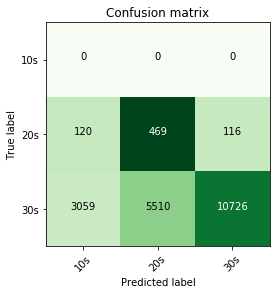

/usr/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         10s       0.00      0.00      0.00      3179
         20s       0.67      0.08      0.14      5979
         30s       0.56      0.99      0.71     10842

   micro avg       0.56      0.56      0.56     20000
   macro avg       0.41      0.36      0.28     20000
weighted avg       0.50      0.56      0.43     20000



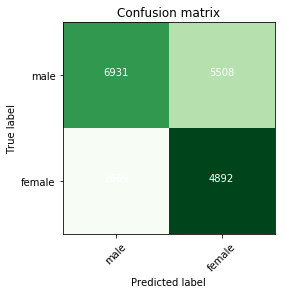

              precision    recall  f1-score   support

      female       0.56      0.72      0.63      9600
        male       0.65      0.47      0.54     10400

   micro avg       0.59      0.59      0.59     20000
   macro avg       0.60      0.60      0.59     20000
weighted avg       0.60      0.59      0.59     20000



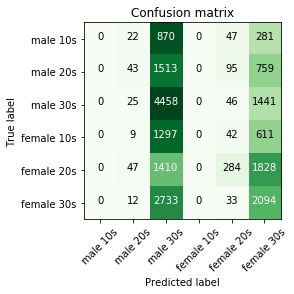

              precision    recall  f1-score   support

  female 10s       0.00      0.00      0.00         0
  female 20s       0.02      0.27      0.03       158
  female 30s       0.75      0.36      0.49     12281
    male 10s       0.00      0.00      0.00         0
    male 20s       0.08      0.52      0.14       547
    male 30s       0.43      0.30      0.35      7014

   micro avg       0.34      0.34      0.34     20000
   macro avg       0.21      0.24      0.17     20000
weighted avg       0.61      0.34      0.43     20000



/usr/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [17]:
cm = confusion_matrix(test_ages, validation_age)
plot_confusion_matrix(cm, ['10s', '20s', '30s'])
print(classification_report(validation_age, test_ages))

cm = confusion_matrix(test_genders, validation_gender)
plot_confusion_matrix(cm, ['male', 'female'])
print(classification_report(validation_gender, test_genders))

merge = matrixmerge(test_genders, test_ages)
merge2 = matrixmerge(validation_gender, validation_age)
cm = confusion_matrix(merge2, merge)
plot_confusion_matrix(cm, ['male 10s', 'male 20s', 'male 30s', 'female 10s', 'female 20s', 'female 30s'])
print(classification_report(merge, merge2))

# Auswertung Validation

Die Genauigkeit ist mit dem Validationset noch genau.

Jedoch ist das Set nicht gleichmässig eingeteilt:


In [18]:
count10 = 0
count20 = 0
count30 = 0

for i in range(N):
    if(messages['person_age'][i] == '10s'):
        count10 = count10 + 1
    if(messages['person_age'][i] == '20s'):
        count20 = count20 + 1
    if(messages['person_age'][i] == '30s'):
        count30 = count30 + 1
        
print('10s: ', count10)
print('20s: ', count20)
print('30s: ', count30)


10s:  16000
20s:  30000
30s:  54000


Man sieht dass, je mehr Datensätze für ein Label vorhanden sind, desto genauer wird klassifiziert


# Test mit Dummy Data

In [19]:
test_messages = pd.read_csv('dummy_test.csv', sep=',')
test_ages = []
test_genders = []
test_both = []
for text in test_messages['text']:
    test_ages.append(classify_age(text))
    test_genders.append(classify_gender(text))
    

# Auswertung mit Dummy Data

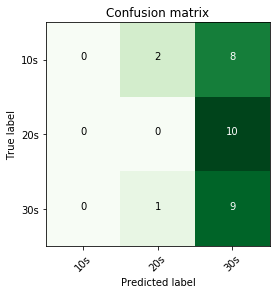

              precision    recall  f1-score   support

         10s       0.00      0.00      0.00        10
         20s       0.00      0.00      0.00        10
         30s       0.33      0.90      0.49        10

   micro avg       0.30      0.30      0.30        30
   macro avg       0.11      0.30      0.16        30
weighted avg       0.11      0.30      0.16        30



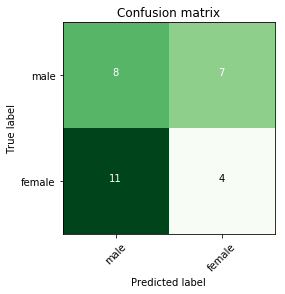

              precision    recall  f1-score   support

      female       0.42      0.53      0.47        15
        male       0.36      0.27      0.31        15

   micro avg       0.40      0.40      0.40        30
   macro avg       0.39      0.40      0.39        30
weighted avg       0.39      0.40      0.39        30



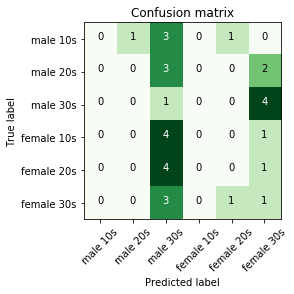

              precision    recall  f1-score   support

  female 10s       0.00      0.00      0.00         0
  female 20s       0.00      0.00      0.00         1
  female 30s       0.20      0.06      0.09        18
    male 10s       0.00      0.00      0.00         0
    male 20s       0.00      0.00      0.00         2
    male 30s       0.20      0.11      0.14         9

   micro avg       0.07      0.07      0.07        30
   macro avg       0.07      0.03      0.04        30
weighted avg       0.18      0.07      0.10        30



In [21]:
cm = confusion_matrix(test_messages['person_age'], test_ages)
plot_confusion_matrix(cm, ['10s', '20s', '30s'])
print(classification_report(test_messages['person_age'], test_ages))

cm = confusion_matrix(test_messages['person_gender'], test_genders)
plot_confusion_matrix(cm, ['male', 'female'])
print(classification_report(test_messages['person_gender'], test_genders))

merge = matrixmerge(test_genders, test_ages)
merge2 = matrixmerge(test_messages['person_gender'], test_messages['person_age'])
cm = confusion_matrix(merge2, merge)
plot_confusion_matrix(cm, ['male 10s', 'male 20s', 'male 30s', 'female 10s', 'female 20s', 'female 30s'])
print(classification_report(merge,merge2))


Wie man sieht ist es mit dem Dummy Test sehr ungenau geworden